In [1]:
from MieSppForce import green_func, frenel, fields, dipoles
import numpy as np
eps_Au = frenel.get_interpolate('Au')

z0= 10
wl=800
stop = 35


GE0, GH0 = green_func.green_ref_00(wl, z0, eps_Au, stop)

GE = green_func.getGE(wl, eps_Au, z0, 1e-6, 0, z0, stop)
GH = green_func.getGH(wl, eps_Au, z0, 1e-6, 0, z0, stop)

phi = 0

rotGE = green_func.get_rotGE(wl, eps_Au, z0, 1e-6, phi, z0, stop)

rotGH = green_func.get_rotGH(wl, eps_Au, z0, 1e-6, phi, z0, stop)

rotGE0, rotGH0 = green_func.rot_green_ref_00(wl, z0, eps_Au, stop)

# for i in range(3):
#     for j in range(3):
#         print('0: ',i+1,j+1, rotGH0[i,j])
#         print('1: ',i+1,j+1, rotGH[i,j])





/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


In [17]:
from MieSppForce import green_func, frenel, fields, dipoles
import numpy as np

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7


eps_Au = frenel.get_interpolate('Au')

#source
z0= 100
wl=800
stop = 35
k = 2*np.pi/wl*1e9

#watch
x = 1000
y = 1000
z= 10

phi = np.arctan2(y,x)
r = np.sqrt(x**2+y**2)

GE = green_func.getGE(wl, eps_Au, z0, r, phi, z, stop)
# GE00 = green_func.cal_GE_slow(wl, eps_Au, z0, r, phi, z, stop)

# p = np.array([[1], 
#               [0], 
#               [0]])
#[G]=Gref_subsEpolaniz(xp,yp,zp,x,y,z,epsAir,epsAu,epsAu,2*pi/lambda,Integr)

print(GE)



[[  -642.43797527+25733.10330764j  14884.97230296-27449.53990521j
  -16279.40954933-18252.00336571j]
 [ 14884.97230296-27449.53990521j   -642.43797527+25733.10330764j
  -16279.40954933-18252.00336571j]
 [ 16279.40954933+18252.00336571j  16279.40954933+18252.00336571j
  128557.24823868-59238.64522502j]]


In [19]:
eps_Si = frenel.get_interpolate('Si')

In [20]:
dipoles.calc_dipoles_v2(800, eps_Au, [0,0,100], 100, eps_Si, 25*np.pi/180, 1, 0,0,35)

(array([[1.88182363e-31-1.14335620e-31j],
        [0.00000000e+00+0.00000000e+00j],
        [2.40532309e-32+6.01489751e-32j]]),
 array([[ 0.00000000e+00+0.00000000e+00j],
        [-5.67395226e-24-5.45814246e-23j],
        [ 0.00000000e+00+0.00000000e+00j]]))

In [14]:
eps_Au(wl)

np.complex128(-24.061488741942565+1.5068228110835038j)

In [68]:
wls = np.linspace(600, 1000, 100)
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')
# R = 147
# dist =2
# a_angle=np.pi/4
# phase=-np.pi/2
# z0= dist + R
# stop = 35
# angle = 25*np.pi/180
# STOP=45


R = 100
dist = 2
angle = 25*np.pi/180
point = [0,0,dist+R]
STOP=45
a_angle = 0
phase = 0

P,M = np.empty((len(wls), 3), dtype=complex), np.empty((len(wls), 3), dtype=complex)

for i in range(len(wls)):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, 1, phase, a_angle, STOP)
    P[i],M[i] = p[:,0], m[:,0]

/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,


In [90]:
dip = np.loadtxt('comsol data/re_px_my_pz.txt', skiprows=8, delimiter=',')

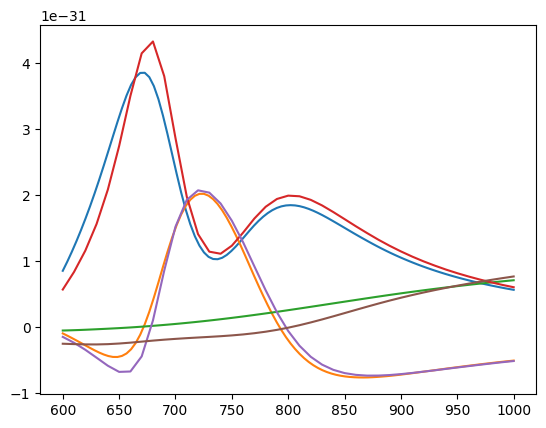

In [91]:
import matplotlib.pyplot as plt

c_const = 299792458
plt.plot(wls, P[:,0].real)
plt.plot(wls, M[:,1].real/c_const)
plt.plot(wls, P[:,2].real)

plt.plot(dip[:,0], dip[:,1])
plt.plot(dip[:,0], dip[:,2])
plt.plot(dip[:,0], dip[:,3])


In [3]:
from MieSppForce import green_func, frenel, fields, dipoles
import numpy as np

eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

R = 120
dist = 2
angle = 25*np.pi/180
# point = [0,0,dist+R]

point = [0,0,R+dist]

STOP=45
a_angle = 0
phase = 0

z = 1
wl=800
phi = np.linspace(0,2*np.pi, 100)
r = np.linspace(1,1000, 50)

print(dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, 1, phase, a_angle, STOP))

ERPHI = np.empty((len(r), len(phi), 3), dtype=complex)
HRPHI = np.empty((len(r), len(phi), 3), dtype=complex)


for i in range(len(r)):
    for j in range(len(phi)):
        E,H = fields.get_field(wl, eps_Au, angle, phase, a_angle, STOP, eps_Si, R, r[i], phi[j], z, point[2] )
        ERPHI[i,j,:] = E
        HRPHI[i,j,:] = H


(array([[5.34104853e-31-3.37376292e-31j],
       [0.00000000e+00+0.00000000e+00j],
       [6.30783922e-33+6.43318130e-32j]]), array([[0.00000000e+00+0.00000000e+00j],
       [5.14035958e-23+5.76089093e-23j],
       [0.00000000e+00+0.00000000e+00j]]))


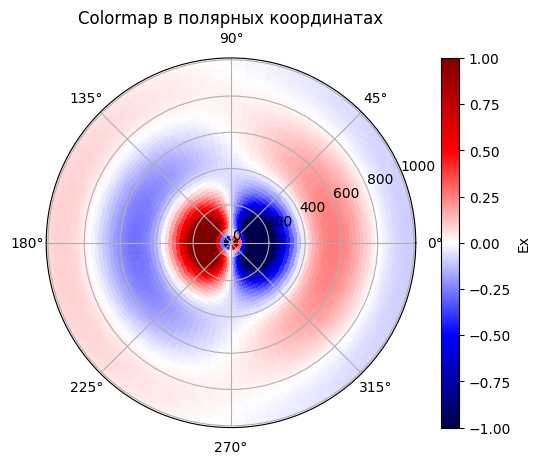

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сетку
R, Phi = np.meshgrid(r, phi, indexing='ij')

# Строим colormap в полярной системе
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(Phi, R, (ERPHI[:,:,0]*np.cos(Phi)+ERPHI[:,:,1]*np.sin(Phi)).real, shading='auto', cmap='seismic', vmax=1, vmin=-1)
#pc = ax.pcolormesh(Phi, R, ERPHI[:,:,2].real, shading='auto', cmap='seismic', vmax=2, vmin=-2)

# Добавляем цветовую шкалу
fig.colorbar(pc, ax=ax, label='Ex')

plt.title('Colormap в полярных координатах')
plt.show()

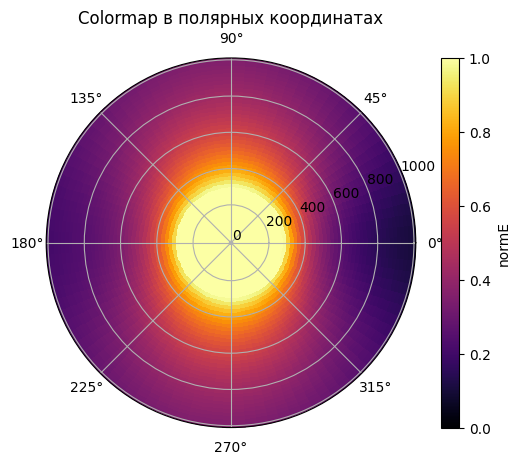

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сетку
R, Phi = np.meshgrid(r, phi, indexing='ij')

# Строим colormap в полярной системе
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(Phi, R, np.sqrt(np.abs(ERPHI[:,:,0])**2 +np.abs(ERPHI[:,:,1])**2 + np.abs(ERPHI[:,:,2])**2), shading='auto', cmap='inferno', vmax=1, vmin=0)
#pc = ax.pcolormesh(Phi, R, ERPHI[:,:,2].real, shading='auto', cmap='seismic', vmax=2, vmin=-2)


# Добавляем цветовую шкалу
fig.colorbar(pc, ax=ax, label='normE')

plt.title('Colormap в полярных координатах')
plt.show()

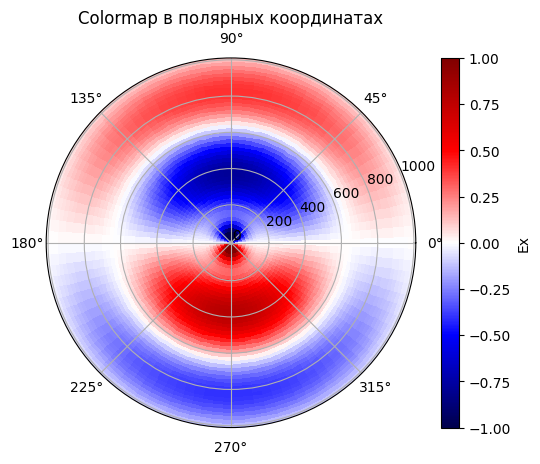

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем сетку
R, Phi = np.meshgrid(r, phi, indexing='ij')

# Строим colormap в полярной системе
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(Phi, R, (-ERPHI[:,:,0]*np.sin(Phi)+ERPHI[:,:,1]*np.cos(Phi)).real, shading='auto', cmap='seismic', vmax=1, vmin=-1)

# Добавляем цветовую шкалу
fig.colorbar(pc, ax=ax, label='Ex')

plt.title('Colormap в полярных координатах')
plt.show()

In [7]:
S = np.real( 0.5 * np.cross(ERPHI[:,:,:], HRPHI[:,:,:].conj(), axis=2))

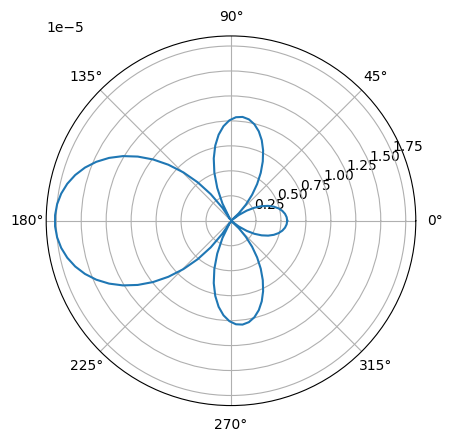

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(phi, np.abs(S[-1,:,0]*np.cos(phi)+S[-1,:,1]*np.sin(phi)))

#ax.plot(phi, -S[-1,:,0]*np.sin(phi)+S[-1,:,1]*np.cos(phi))

#ax.plot(phi, S[-1,:,2])